In [2]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


# **Analise exploratoria**

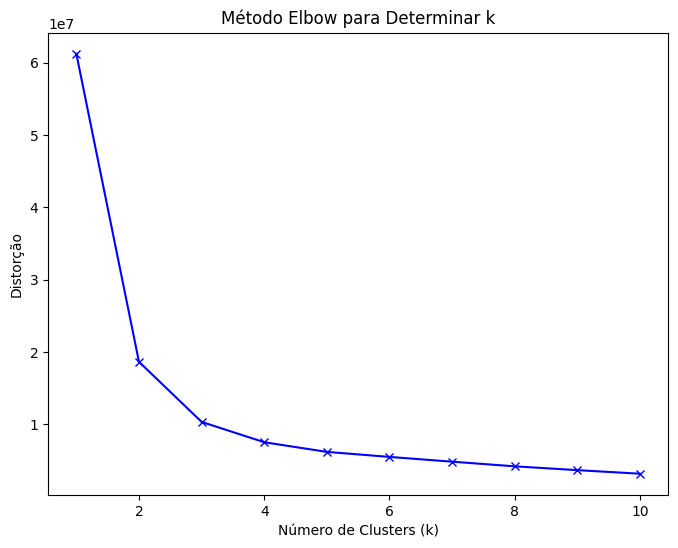

In [4]:
# Carga de dados
df = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv')
features_for_kmeans = ['Age', 'Cholesterol','Diabetes']

# Inicializando a lista de distorções
distortions = []

# Testando diferentes valores de k
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[features_for_kmeans])
    distortions.append(kmeanModel.inertia_)

# Plotando o gráfico do Método Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorção')
plt.title('Método Elbow para Determinar k')
plt.show()


***Realização de testes para descobrir o numero Klurters com o maior Silhouette Score***

In [28]:
# Escolha do número de clusters (k)
chosen_k = 4

# Treinando o modelo com o número escolhido de clusters
kmeanModel = KMeans(n_clusters=chosen_k)
kmeanModel.fit(df[features_for_kmeans])

# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_

# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels


In [29]:
# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_
# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

In [30]:
# Calculando o Silhouette Score para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(df[features_for_kmeans], cluster_labels)
print(f"Silhouette Score para {chosen_k} clusters: {silhouette_avg:.2f}")


Silhouette Score para 4 clusters: 0.43


In [31]:
# Escolha do número de clusters (k)
chosen_k = 3
kmeanModel = KMeans(n_clusters=chosen_k)
kmeanModel.fit(df[features_for_kmeans])
cluster_labels = kmeanModel.labels_
df['Cluster'] = cluster_labels

In [32]:
# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_
# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

In [33]:
# Calculando o Silhouette Score para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(df[features_for_kmeans], cluster_labels)
print(f"Silhouette Score para {chosen_k} clusters: {silhouette_avg:.2f}")

Silhouette Score para 3 clusters: 0.49


O Silhouette Score mais alto para 3 clusters (0.49) em comparação com 4 clusters (0.43) indica uma melhor separação entre grupos no primeiro caso. Portanto, a escolha de 3 clusters parece mais apropriada para este conjunto de dados.

In [9]:
print(df.describe())


               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

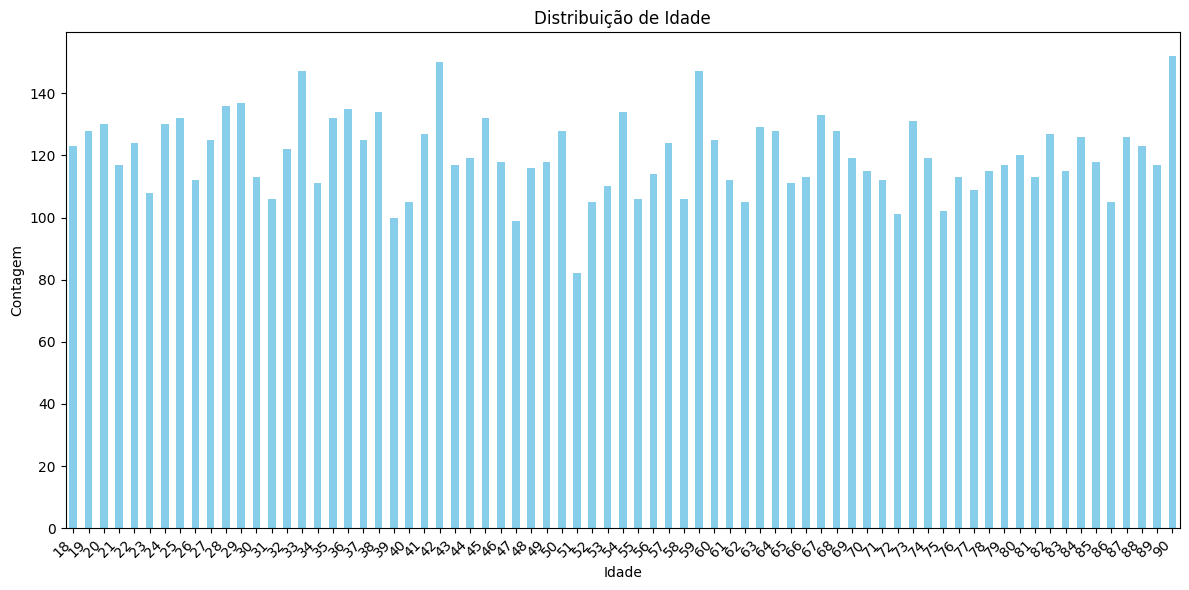

In [18]:
# Criar gráfico de barras para a coluna 'Age' com rótulos rotacionados
plt.figure(figsize=(12, 6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#O gráfico de barras exibe a distribuição da idade no conjunto de dados, onde cada barra representa uma
#faixa etária e a altura reflete a contagem de pessoas nessa faixa.

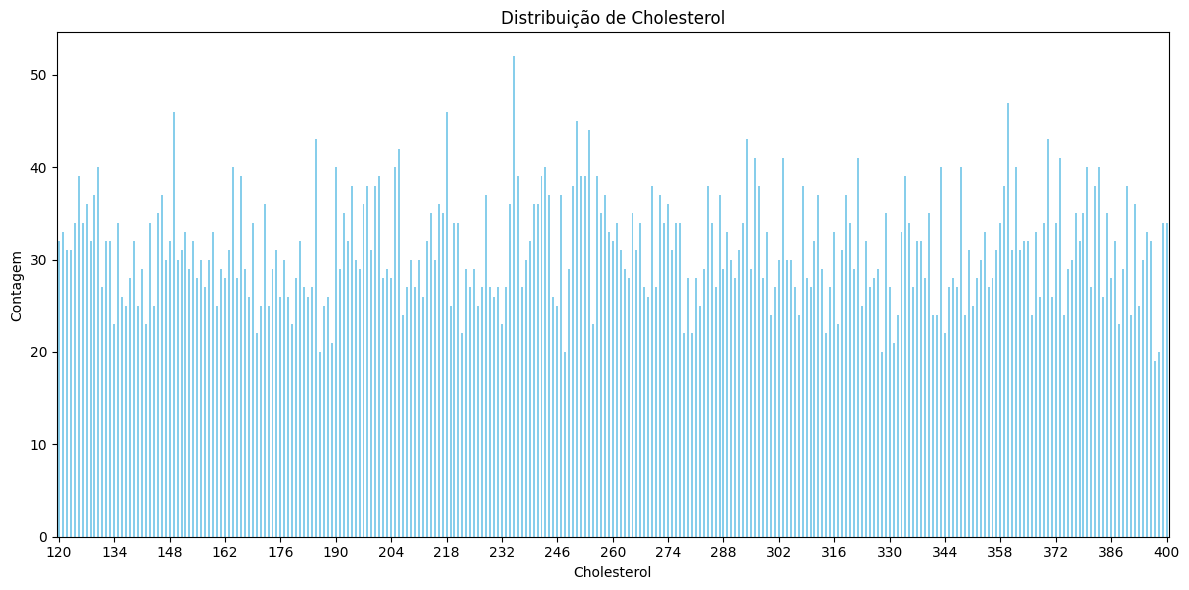

In [22]:
# Convertendo a coluna 'Cholesterol' para string e criando o gráfico de barras
plt.figure(figsize=(12, 6))
counts = df['Cholesterol'].astype(str).str.lower().value_counts().sort_index()
counts.plot(kind='bar', color='skyblue')

# Ajustar rótulos do eixo x
step = max(1, len(counts) // 20)
plt.xticks(range(0, len(counts), step), counts.index[::step], rotation=0, ha='center')

plt.title('Distribuição de Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

In [ ]:
#O gráfico de barras para colesterol ilustra a distribuição dos níveis dessa variável no conjunto de dados.
#Cada barra representa uma categoria de colesterol, com a altura indicando a quantidade de pessoas associadas

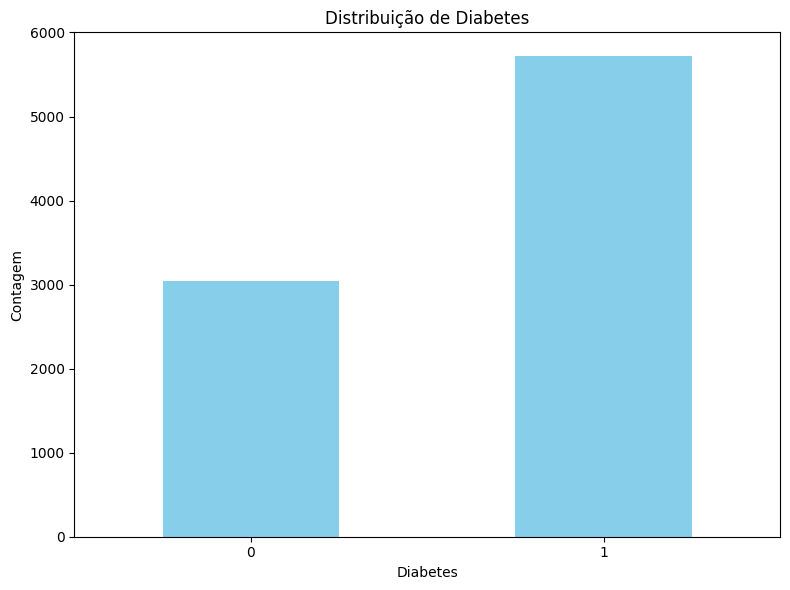

In [24]:
plt.figure(figsize=(8, 6))
df['Diabetes'].astype(str).str.lower().value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Contagem')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [ ]:
#O gráfico de barras mostra a contagem de pessoas com e sem diabetes. Cada barra representa uma categoria ('Sim' ou 'Não')
#e sua altura indica a quantidade de pessoas associadas a cada condição.

# **Utilizando a técnica de redução de dimensionalidade Principal Component Analysis (PCA) e apresentando os resultados**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Selecionando as colunas para aplicar o PCA
features_for_pca = ['Age', 'Cholesterol']


In [ ]:
# Normalizando os dados antes de aplicar o PCA (opcional, mas muitas vezes recomendado)
df_normalized = (df[features_for_pca] - df[features_for_pca].mean()) / df[features_for_pca].std()

In [ ]:
# Aplicando o PCA com o número desejado de componentes principais
num_components = 2
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(df_normalized)

In [ ]:
# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
# Adicionando os rótulos dos clusters ao DataFrame PCA
pca_df['Cluster'] = cluster_labels

# Visualizando as primeiras linhas do DataFrame PCA com os rótulos dos clusters
print(pca_df.head())

        PC1       PC2  Cluster
0  0.895949 -0.011328        0
1 -2.217514  0.040708        1
2 -1.649123 -0.527683        1
3 -0.068635  2.084653        1
4 -0.099219  0.917287        1
